In [71]:
import pyodbc 
import pandas as pd
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=vantagepoint;'
                      'Database=DLRDW;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()

In [72]:
query = """ SELECT  DP.*,a.ProjectSquareFeet FROM [DLRDW].[bi_dds].DimProject DP 
inner join (SELECT [ProjectKey],[ProjectSquareFeet]
      FROM [DLRDW].[bi_dds].[FactBuild]
	  where [ProjectSquareFeet]>0
	  group by [ProjectKey],[ProjectSquareFeet]) a
on DP.ProjectKey=A.ProjectKey
where DP.SectorName='ED K-12' and DP.ProjectAddress IS NOT NULL
  """

In [73]:
Projects = pd.read_sql_query(query,conn)

In [74]:
Projects['BusinessPartnerName'].value_counts()

Urbandale Community School District        29
Ankeny Community School District           26
Paradise Valley Unified School District    23
J.O. Combs S.D. #44                        22
Carlisle Community School District (IA)    18
                                           ..
Dr. Miriam & Sheldon G. Adelson HS          1
Great River Regional Library                1
Independence Public Schools (MO)            1
St. Gabriel Parish                          1
CORE Construction (AZ)                      1
Name: BusinessPartnerName, Length: 499, dtype: int64

In [75]:
#number of vendor records
len(Projects)

1454

AxesSubplot(0.125,0.125;0.775x0.755)
58000.0


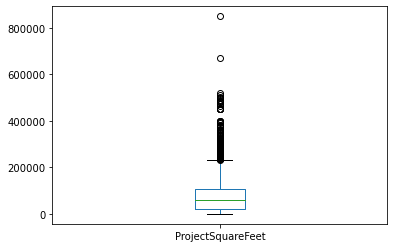

In [76]:
print(Projects[Projects['ProjectSquareFeet']<900000]['ProjectSquareFeet'].plot(kind='box'))
#print(Projects[Projects['ProjectSquareFeet']<900000]['ProjectSquareFeet'].hist())
print(Projects[Projects['ProjectSquareFeet']<900000]['ProjectSquareFeet'].median())

AxesSubplot(0.125,0.125;0.775x0.755)


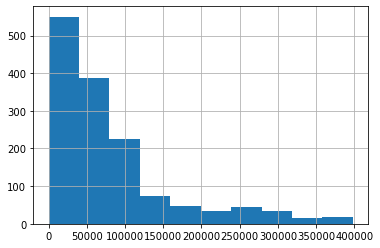

In [77]:
print(Projects[Projects['ProjectSquareFeet']<400000]['ProjectSquareFeet'].hist())

In [78]:
schooldata=pd.read_csv('C:/Users\dmckenzie\OneDrive - DLR Group\Desktop\ELSI_csv_export_6375574670841542982899.csv')

In [79]:
schooldata.iloc[:,2:4]=schooldata.iloc[:,2:4].replace('†','')

In [80]:
schooldata['FullAddress']=schooldata.iloc[:,1].astype(str).str.replace('None','')+" "+\
    schooldata.iloc[:,2].astype(str).str.replace('None','')+" "+\
    schooldata.iloc[:,3].astype(str).str.replace('None','')+" "+\
    schooldata.iloc[:,4].astype(str).str.replace('None','')+" "+\
    schooldata.iloc[:,5].astype(str).str.replace('None','')+" "+\
    schooldata.iloc[:,6].astype(str).str.replace('None','')

In [81]:
import nltk

In [82]:
schooldata=schooldata[schooldata['FullAddress'].isna()==False]

In [83]:
schooldata['FullAddress']=schooldata['FullAddress'].apply(nltk.word_tokenize).apply(' '.join)

In [84]:
schooldata['FullAddress']=schooldata['FullAddress'].str.lower().str.replace('.','').str.replace(',','').str.replace('-','').str.replace('#','')

In [85]:
Projects['FullAddress']=Projects.iloc[:,8].astype(str).str.replace('None','')+" "+\
    Projects.iloc[:,9].astype(str).str.replace('None','')+" "+\
    Projects.iloc[:,10].astype(str).str.replace('None','')+" "+\
    Projects.iloc[:,11].astype(str).str.replace('None','')+" "+\
    Projects.iloc[:,12].astype(str).str.replace('None','')+" "+\
    Projects.iloc[:,13].astype(str).str.replace('None','')

In [86]:
Projects['FullAddress']=Projects['FullAddress'].apply(nltk.word_tokenize).apply(' '.join).str.lower().str.replace('.','').str.replace(',','').str.replace('-','').str.replace('#','')

In [87]:
#schooldata['School Type [Public School] 2019-20']

In [88]:
schooldata.columns

Index(['School Name', 'Location Address 1 [Public School] 2019-20',
       'Location Address 2 [Public School] 2019-20',
       'Location Address 3 [Public School] 2019-20',
       'Location City [Public School] 2019-20',
       'Location State Abbr [Public School] 2019-20',
       'Location ZIP [Public School] 2019-20',
       'Location ZIP4 [Public School] 2019-20',
       'School Type [Public School] 2019-20',
       'Charter School [Public School] 2019-20',
       'Magnet School [Public School] 2019-20',
       'Total Students All Grades (Includes AE) [Public School] 2019-20',
       'Pupil/Teacher Ratio [Public School] 2019-20',
       'Latitude [Public School] 2019-20', 'Longitude [Public School] 2019-20',
       'School ID - NCES Assigned [Public School] Latest available year',
       'FullAddress'],
      dtype='object')

In [89]:
aaa=schooldata['Total Students All Grades (Includes AE) [Public School] 2019-20'].value_counts().index[2]

In [90]:
aaa

'–'

In [91]:
schooldata=schooldata[(schooldata['Total Students All Grades (Includes AE) [Public School] 2019-20']!='†') & 
                     (schooldata['Total Students All Grades (Includes AE) [Public School] 2019-20']!='‡') &
                     (schooldata['Total Students All Grades (Includes AE) [Public School] 2019-20']!=aaa) ]

In [92]:
schooldata['Total Students All Grades (Includes AE) [Public School] 2019-20']=schooldata['Total Students All Grades (Includes AE) [Public School] 2019-20'].astype(int)

In [93]:
len(schooldata)

97822

In [94]:
schooldata=schooldata[schooldata.groupby('FullAddress')['Total Students All Grades (Includes AE) [Public School] 2019-20'].transform('count')==1]

In [95]:
#schooldata['Total']=schooldata.groupby('FullAddress')['Total Students All Grades (Includes AE) [Public School] 2019-20'].transform('sum')
#df.groupby(['c','d']).transform(f)
#groupby(['Total Students All Grades (Includes AE) [Public School] 2019-20'])

In [96]:
#schooldata=schooldata.drop_duplicates(subset=['FullAddress'])

In [97]:
from_list =Projects['FullAddress'].to_list()
two_list=schooldata['FullAddress'].to_list()

In [98]:
from polyfuzz.models import TFIDF
from polyfuzz import PolyFuzz

tfidf = TFIDF(n_gram_range=(1, 3))
model = PolyFuzz(tfidf)
model.match(from_list, two_list)

In [99]:
model.get_matches().sort_values('Similarity',ascending=False)

,From,To,Similarity
212,5642 rosehill shawnee mission ks 66216,5642 rosehill shawnee mission ks 66216,1.000000
497,9150 lexington drive colorado springs co 80920,9150 lexington drive colorado springs co 80920,1.000000
868,6888 black forest road colorado springs co 80923,6888 black forest road colorado springs co 80923,1.000000
528,18211 w las brisas dr goodyear az 85338,18211 w las brisas dr goodyear az 85338,1.000000
1329,130 alameda ave tacoma wa 98466,130 alameda ave tacoma wa 98466,1.000000
...,...,...,...
103,33980 310th street neola ia 515595183,310 10th street rupert id 83350,0.371288
1074,highway 89a and red rock loop road sedona az 0...,highway 61 and cinder road concho az 85924,0.361526
545,800 north 6th muscoda wi 55373,3550 east river rd oscoda mi 48750,0.361303
223,714 date st schleswig ia 51461,11461 west state hwy 31 mcalester ok 74501,0.323086


In [100]:
matchdf=model.get_matches().sort_values('Similarity',ascending=False)

In [101]:
matchdf[matchdf['Similarity']>=.88]

,From,To,Similarity
212,5642 rosehill shawnee mission ks 66216,5642 rosehill shawnee mission ks 66216,1.000000
497,9150 lexington drive colorado springs co 80920,9150 lexington drive colorado springs co 80920,1.000000
868,6888 black forest road colorado springs co 80923,6888 black forest road colorado springs co 80923,1.000000
528,18211 w las brisas dr goodyear az 85338,18211 w las brisas dr goodyear az 85338,1.000000
1329,130 alameda ave tacoma wa 98466,130 alameda ave tacoma wa 98466,1.000000
...,...,...,...
713,705 north mary street lancaster pa 17603,705 n mary st lancaster pa 17603,0.881676
1246,holmen wi 54636,502 n main st holmen wi 54636,0.880504
557,920 west 29th street loveland co 80538,920 west 29th avenue loveland co 80538,0.880235
451,1601 west main street mesa az 85201,1601 w main st mesa az 85201,0.880084


In [226]:
matchdf2=Projects[Projects['FullAddress'].isna()==False].\
         set_index('FullAddress').join(matchdf[matchdf['Similarity']>=.88].drop_duplicates(subset='From').\
    set_index('From'),how='inner').\
    reset_index().\
    rename(columns = {'index':'Project Scrubbed Address'}).\
    set_index('To').\
    join(schooldata.set_index('FullAddress')[['School Name',
                                              'Location State Abbr [Public School] 2019-20',
                                              'Total Students All Grades (Includes AE) [Public School] 2019-20']],how='inner').\
    reset_index().\
    rename(columns = {'index':'School Scrubbed Address'}).\
    sort_values('Similarity',ascending=False)[['School Scrubbed Address',
                                               'Location State Abbr [Public School] 2019-20',
                                               'ProjectKey',
                                               'ProjectName',
                                               'Status',
                                               'BuildingType',
                                               'School Name',
                                               'Total Students All Grades (Includes AE) [Public School] 2019-20',
                                               'ProjectSquareFeet']].\
    rename(columns = {'School Scrubbed Address':'Address',
                      'Location State Abbr [Public School] 2019-20':'State'})

In [227]:
import numpy as np

In [228]:
matchdf2=matchdf2[matchdf2['BuildingType'].isin(['Master Plan','Wellness Center','Athletic Field',
                               'Parking','Other','Mixed Use'])==False]

In [229]:
matchdf2['BuildingType'].value_counts()

Elementary School    119
High School          114
Academic             109
Middle School         49
Name: BuildingType, dtype: int64

In [230]:
matchdf2['BuildingType']=np.where(matchdf2['ProjectName'].str.lower().str.contains('elem'),'Elementary School',
                                  np.where(matchdf2['ProjectName'].str.contains('E.S.'),'Elementary School',
        np.where(matchdf2['ProjectName'].str.lower().str.contains('middle'),'Middle School',
                 np.where(matchdf2['ProjectName'].str.lower().str.contains('high s'),'High School',
                          np.where(matchdf2['ProjectName'].str.contains('HS'),'High School',
                                   np.where(matchdf2['ProjectName'].str.contains('H.S.'),'High School',
                          matchdf2['BuildingType']))))))

In [231]:
matchdf2['SQFT_Per_Student']=matchdf2['ProjectSquareFeet']/matchdf2['Total Students All Grades (Includes AE) [Public School] 2019-20']

In [232]:
matchdf2=matchdf2[matchdf2['Total Students All Grades (Includes AE) [Public School] 2019-20']!=0]

In [233]:
matchdf2=matchdf2[matchdf2['SQFT_Per_Student']<500]

In [241]:
matchdf2=matchdf2[matchdf2['SQFT_Per_Student']>10]

In [245]:
matchdf2[matchdf2['SQFT_Per_Student']<50]

,Address,State,ProjectKey,ProjectName,BuildingType,School Name,Total Students All Grades (Includes AE) [Public School] 2019-20,ProjectSquareFeet,SQFT_Per_Student
159,16610 bennington road bennington ne 68007,NE,74309,Bennington HS Aux Gym Addn,High School,BENNINGTON HIGH SCHOOL,766,26500.0,34.595300
323,3302 w 18th ave emporia ks 66801,KS,9220,Emporia High School Addns & Renov,High School,EMPORIA HIGH,1598,55566.0,34.772215
331,35 s 4th street philadelphia pa 19106,PA,50465,Mastery Charter School Lenfest Campus Re,Academic,MASTERY CHS-LENFEST CAMPUS,582,12000.0,20.618557
332,35 s 4th street philadelphia pa 19106,PA,50466,Mastery Charter School Lenfest Campus Re,Academic,MASTERY CHS-LENFEST CAMPUS,582,12000.0,20.618557
376,425 n waverly road gardner ks 66030,KS,75980,Gardner Edgerton HS-Additions & Renov,High School,GARDNER EDGERTON HIGH,1725,50000.0,28.985507
...,...,...,...,...,...,...,...,...,...
233,2211 south 55th kansas city ks 66106,KS,10430,Highland/Pierson/Turner High Remodel,None,TURNER HIGH,1108,19000.0,17.148014
438,510 long coulee rd holmen wi 54636,WI,24092,Holmen Elem Sch-Evergreen Mods,Elementary School,EVERGREEN ELEMENTARY,367,15000.0,40.871935
477,661 capistrano drive pueblo west co 81007,CO,20421,Pueblo West HS Add & Ren,High School,PUEBLO WEST HIGH SCHOOL,1394,55175.0,39.580344
486,700 w north st bradley il 60915,IL,12400,BBCHS - 09 Phase I Addition,High School,BRADLEY-BOURBONNAIS C HIGH SCHOOL,1944,29500.0,15.174897


In [234]:
matchdf2=matchdf2[matchdf2['Status']=='D']

In [235]:
matchdf2=matchdf2.drop(columns=['Status'])

In [243]:
matchdf2.to_csv('C:/Users\dmckenzie\OneDrive - DLR Group\Desktop\Fuzzy Address For Enrollment2.csv')

In [244]:
matchdf2['BuildingType'].value_counts()

Elementary School    146
High School          117
Middle School         50
Academic              23
Name: BuildingType, dtype: int64

In [107]:
matchdf2.sort_values(['SQFT_Per_Student'],ascending=False).head(20)

,Address,State,Similarity,ProjectKey,ProjectName,Status,BuildingType,School Name,Total Students All Grades (Includes AE) [Public School] 2019-20,ProjectSquareFeet,SQFT_Per_Student
495,421 walnut street farmington mn 55024,MN,0.911101,21691,Farmington High School,D,High School,DAKOTA COUNTY AREA LEARNING SCHOOL,18,453100.0,25172.222222
494,421 walnut street farmington mn 55024,MN,0.911101,21698,Farmington HS FF&E Package,D,High School,DAKOTA COUNTY AREA LEARNING SCHOOL,18,450000.0,25000.000000
496,421 walnut street farmington mn 55024,MN,0.911101,21694,Farmington High School N,D,None,DAKOTA COUNTY AREA LEARNING SCHOOL,18,450000.0,25000.000000
378,3000 n dysart rd avondale az 85392,AZ,0.932453,15578,AAEC Coronado Plaza T.I.,D,High School,WEST-MEC ESTRELLA MOUNTAIN COMMUNITY COLLEGE,2,23000.0,11500.000000
362,2751 de ronde dr fairfield ca 94533,CA,0.922597,32890,TUSD Scandia Elem School,D,Academic,TRAVIS INDEPENDENT STUDY,6,58871.0,9811.833333
194,1524 e 103rd st los angeles ca 90002,CA,0.806668,83015,Swinerton - Jordan HS,D,High School,THOMAS RILEY HIGH,47,220448.0,4690.382979
602,606 east 4th street chaska mn 55318,MN,0.808461,21027,Carver-Scott Educational Cooperative,D,High School,SW METRO CCJ,4,17800.0,4450.000000
570,510 chambers street steilacoom wa 98388,WA,0.920286,28515,Steilacoom Sd-Pioneer Middle Sch Impro,D,None,FUTURES PROGRAM,10,44400.0,4440.000000
338,2410 girard ave north minneapolis mn 55411,MN,0.924423,23978,NECL - North Star Elementary,D,Academic,PREKINDERGARTEN NORTH,5,20465.0,4093.000000
129,1250 west broadway ave minneapolis mn 55411,MN,0.961027,21044,Broadway Elementary,D,Elementary School,MINNEAPOLIS ON LINE LEARNING,49,135000.0,2755.102041


In [192]:
from plotnine import *

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 775'. Pick better value with 'binwidth'.


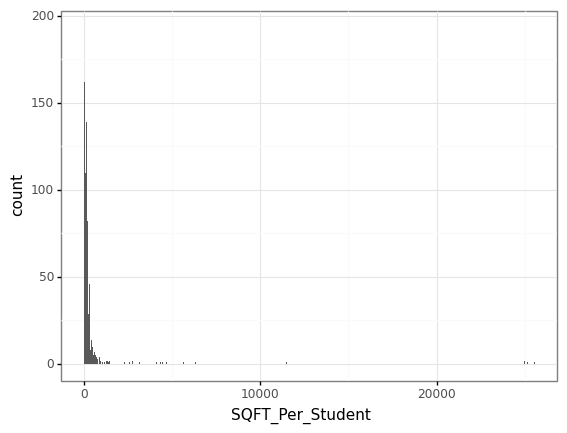

<ggplot: (-9223371921105504548)>

In [212]:
    (
    ggplot(matchdf2)
    + geom_histogram(aes("SQFT_Per_Student"))
    )+theme_bw()

In [213]:
len(matchdf2[matchdf2['SQFT_Per_Student']<500])

1124

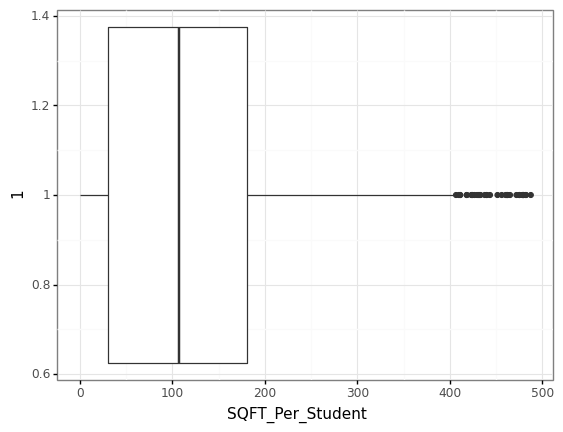

<ggplot: (-9223371921104406108)>

In [214]:
    (
    ggplot(matchdf2[matchdf2['SQFT_Per_Student']<500])
    + geom_boxplot(aes(x=1,y="SQFT_Per_Student"))
    )+theme_bw()+coord_flip()

In [215]:
matchdf2[matchdf2['SQFT_Per_Student']<500]['BuildingType'].value_counts()

High School          236
Elementary School    226
Academic             188
Middle School         95
Other                 14
Athletic Field         9
Library                8
Industrial             7
Study                  5
Mixed Use              3
theatre                2
Football Stadium       1
Parking                1
Retail                 1
Master Plan            1
Office                 1
Wellness Center        1
Name: BuildingType, dtype: int64

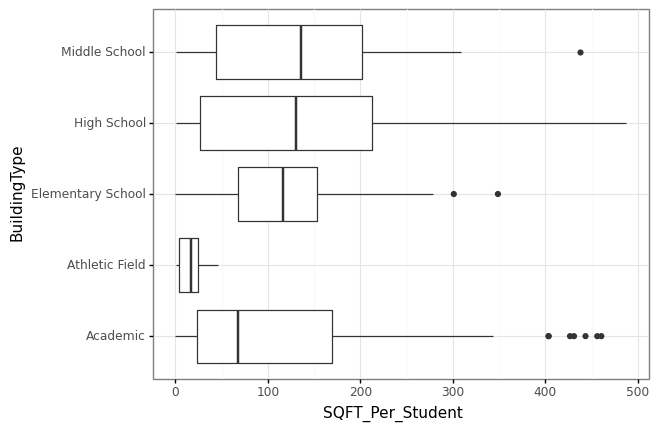

<ggplot: (-9223371921106582256)>

In [227]:
    (
    ggplot((matchdf2[(matchdf2['Status']=='D') & (matchdf2['SQFT_Per_Student']<500) & (matchdf2['BuildingType'].isin(['High School','Athletic Field',
                                                                                       'Elementary School','Academic',
                                                                                       'Middle School']))]))
    + geom_boxplot(aes(x='BuildingType',y="SQFT_Per_Student"))
    )+theme_bw()+coord_flip()

In [217]:
matchdf2.to_csv('Documents\Fuzzy Address For Enrollment.csv')